#Image Processing notes

A short collection of useful Python image processing notes.

In [1]:
%pylab inline

from scipy import ndimage

from skimage import filters, data
import skimage as ski

Populating the interactive namespace from numpy and matplotlib


##Median filtering

Below I demonstrate the differences between the median filter implementations of `skimage` and `ndimage`.

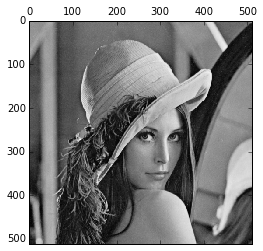

In [2]:
myData = uint16(ski.exposure.rescale_intensity(ski.color.rgb2gray(data.lena()),out_range='uint16'))
matshow(myData, cmap = 'gray')

uint8
float64


//anaconda/lib/python3.4/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


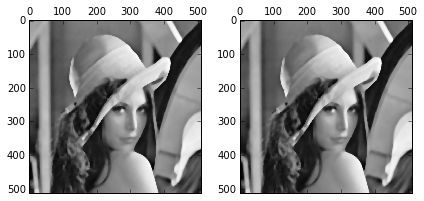

In [41]:
#float64 images
myData = ski.color.rgb2gray(data.lena())
ski_mf_data = filters.median(myData,uint8(ones((10,10))))
nd_mf_data = ndimage.median_filter(myData,10)
fig, ax = subplots(1,2,squeeze=True)
ax[0].matshow(ski_mf_data,cmap='gray')
ax[1].matshow(nd_mf_data,cmap='gray')

fig.tight_layout()

print(ski_mf_data.dtype)
print(nd_mf_data.dtype)

uint16
uint16


//anaconda/lib/python3.4/site-packages/skimage/filters/rank/generic.py:68: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


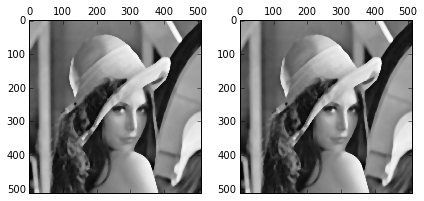

In [40]:
#16 bit images
myData = uint16(ski.exposure.rescale_intensity(ski.color.rgb2gray(data.lena()),out_range='uint16'))
ski_mf_data = filters.median(myData,uint8(ones((10,10))))
nd_mf_data = ndimage.median_filter(myData,10)

fig, ax = subplots(1,2,squeeze=True)
ax[0].matshow(ski_mf_data,cmap='gray')
ax[1].matshow(nd_mf_data,cmap='gray')

fig.tight_layout()

print(ski_mf_data.dtype)
print(nd_mf_data.dtype)

uint8
uint8


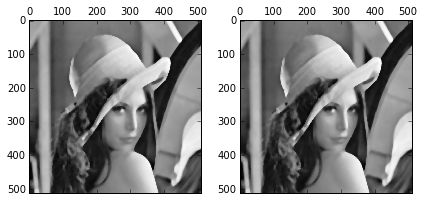

In [47]:
#8 bit images
myData = uint8(ski.exposure.rescale_intensity(ski.color.rgb2gray(data.lena()),out_range='uint8'))
ski_mf_data = filters.median(myData,uint8(ones((10,10))))
nd_mf_data = ndimage.median_filter(myData,10)

fig, ax = subplots(1,2,squeeze=True)
ax[0].matshow(ski_mf_data,cmap='gray')
ax[1].matshow(nd_mf_data,cmap='gray')

fig.tight_layout()

print(ski_mf_data.dtype)
print(nd_mf_data.dtype)

In [3]:
#float64
myData = ski.color.rgb2gray(data.lena())
%timeit filters.median(myData,ones((10,10)))
%timeit filters.rank.median(myData,ones((10,10)))
%timeit nd_mf_data = ndimage.median_filter(myData,10)
myData.dtype

//anaconda/lib/python3.4/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
//anaconda/lib/python3.4/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


10 loops, best of 3: 117 ms per loop
10 loops, best of 3: 122 ms per loop
1 loops, best of 3: 635 ms per loop


dtype('float64')

In [4]:
#uint16
myData = uint16(ski.exposure.rescale_intensity(ski.color.rgb2gray(data.lena()),out_range='uint16'))
%timeit filters.median(myData,ones((10,10)))
%timeit filters.median(myData,uint8(ones((10,10))))
%timeit nd_mf_data = ndimage.median_filter(myData,10)
myData.dtype

//anaconda/lib/python3.4/site-packages/skimage/filters/rank/generic.py:68: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)
//anaconda/lib/python3.4/site-packages/skimage/filters/rank/generic.py:68: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


1 loops, best of 3: 8.02 s per loop
1 loops, best of 3: 8.64 s per loop
1 loops, best of 3: 603 ms per loop


dtype('uint16')

In [6]:
#uint8
myData = uint8(ski.exposure.rescale_intensity(ski.color.rgb2gray(data.lena()),out_range='uint8'))
%timeit filters.median(myData,ones((10,10)))
%timeit filters.median(myData,uint8(ones((10,10))))
%timeit nd_mf_data = ndimage.median_filter(myData,10)
myData.dtype

10 loops, best of 3: 118 ms per loop
10 loops, best of 3: 119 ms per loop
1 loops, best of 3: 595 ms per loop


dtype('uint8')

It looks like `skimage`'s median filter is only good for `uint8` data types. If its a float it will be downgraded to `uint8` and if its `uint16` its really, *really*, slow.

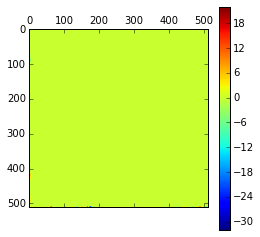

In [50]:
#take a look at the difference

matshow(ski_mf_data*1.0-1.0*nd_mf_data)
colorbar()

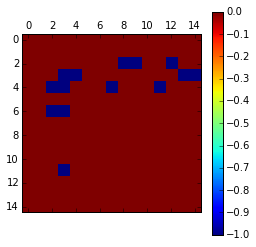

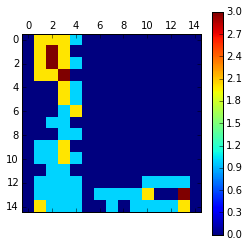

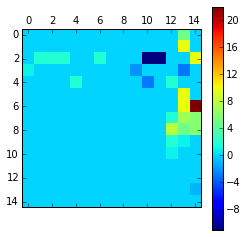

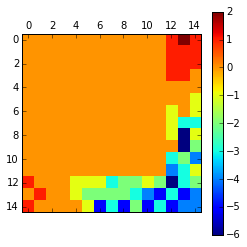

In [57]:
#The edges are different between the two methods. I don't really know why...
matshow((ski_mf_data*1.0-1.0*nd_mf_data)[0:15,0:15])
colorbar()
matshow((ski_mf_data*1.0-1.0*nd_mf_data)[-16:-1,0:15])
colorbar()
matshow((ski_mf_data*1.0-1.0*nd_mf_data)[0:15,-16:-1])
colorbar()
matshow((ski_mf_data*1.0-1.0*nd_mf_data)[-16:-1,-16:-1])
colorbar()

##Selective median filter

Need to write a selective median filter which will look at an image with a given structuring element. If a given pixel is outside of a certain range of the mean within that structuring element than a median filter should be carried out. If not the pixel should be left alone. This will remove spurious pixels but not degrade image resolution as we assume that such **hot** pixels are sparse and well separated.